(398, 7) (398,) (214, 7) (214,) (100, 7) (100,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________________

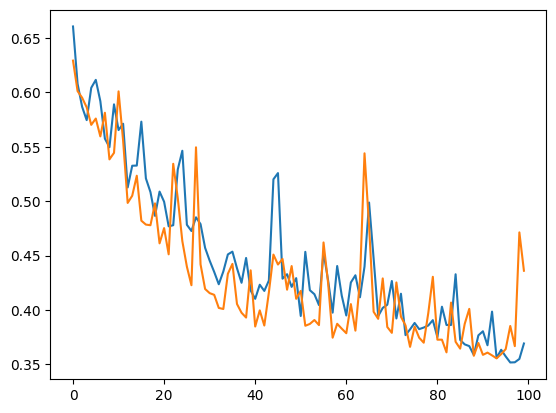

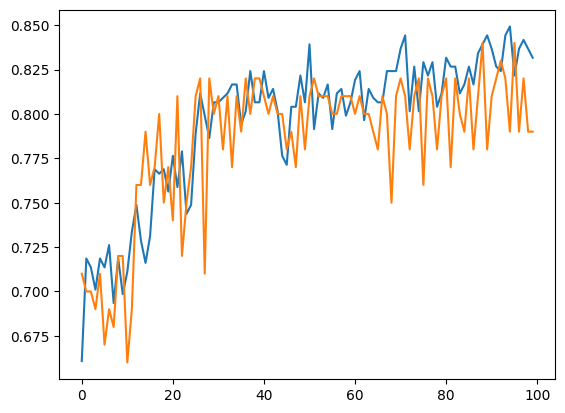

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

df=sns.load_dataset('titanic')

df1=df.drop(['who','adult_male','deck','deck','embark_town','alive','alone','class'],axis=1)

df2=df1.dropna()

x=df2.drop(['survived'], axis = 1)
y=df2['survived']
x['sex']=x['sex'].replace(np.unique(x['sex']), range(len(np.unique(x['sex']))))
x['embarked']=x['embarked'].replace(np.unique(x['embarked']), range(len(np.unique(x['embarked']))))

x['sex']=x['sex'].astype(int)
x['embarked']=x['embarked'].astype(int)

x_data, tt_x, y_data, tt_y = train_test_split(x, y, test_size = 0.3, random_state=42)
tr_x, val_x, tr_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state=42)
print(tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape,val_x.shape,val_y.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()

model.add(Dense(128, activation = 'relu',input_shape=tr_x.shape[1:]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics='acc')
hy = model.fit(tr_x,tr_y,validation_data=(val_x,val_y),epochs=100)

model.evaluate(tt_x,tt_y)

import matplotlib.pyplot as plt

plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()

plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()